In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import copy
import warnings
import random
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dj38.tsp', sep=" ", skiprows=10, header=None)
df=df.drop(df.columns[[0]], axis = 1)
df.columns=list(['x','y'])
df_ = np.asarray(df)
df

,x,y
0,11003.6111,42102.5000
1,11108.6111,42373.8889
2,11133.3333,42885.8333
3,11155.8333,42712.5000
4,11183.3333,42933.3333
5,11297.5000,42853.3333
6,11310.2778,42929.4444
7,11416.6667,42983.3333
8,11423.8889,43000.2778
9,11438.3333,42057.2222


In [3]:
# calculate the distance 
def distance(route):
    distance=0
    for i in range(len(route)-1):
        p=df_[route[i+1]]-df_[route[i]]
        dis=math.hypot(p[0],p[1])
        distance=distance+dis
    p=df_[route[-1]]-df_[route[0]]
    # distance between last and fist city
    distance=distance+math.hypot(p[0],p[1])
    return distance

In [4]:
# plot the route
def plot_route(route_best):
    df_route=df.iloc[route_best]
    df_route.loc['origin'] =df_route.iloc[0]
    cities_route = np.asarray(df_route)

    plt.scatter(df_[:,0],df_[:,1])
    plt.plot(cities_route[:,0],cities_route[:,1])
    plt.show()
    print("Route: " + str(route_best) + "\n\nDistance_scaled: "+ str(distance(route_best)) )

In [14]:
def plot_RE(df):
    legend_list,legend_name=[],[]
    for i in range(N):
        legend_name.append('replica' + str(i+1))
        i,=plt.plot(df[i])
        legend_list.append(i)  
    plt.xlabel("iteration")
    plt.ylabel("total_time")
    plt.legend(legend_list,legend_name)
    plt.show
def output_solution(route,distance):
    for i in range(N):
        print('replica' + str(i+1)+' best solution:',distance(route[i]))

In [11]:
def MCMC_RE(N,T,cooling_rate,T_min,iteration,distance):
    
    random.seed(2022)
    time_start=datetime.datetime.now()
    print("start:",time_start)
        
    #initial sequence 
    route=[]
    distance_min_distribution=[]
    for i in range (N):
        route.append(np.random.choice(df.shape[0],df.shape[0],replace=False))
        distance_min_distribution.append([])   
    
    while T[0]>T_min:
        for i in range(N):
            for j in range(iteration):
       
                dis=distance(route[i])
                distance_min_distribution[i].append(dis)
            
                # generate new route
                route_new= copy.copy(route[i])
            
                #switch two successive points
                #a = np.random.randint(0, df.shape[0] - 1)
                #route_new[[a, (a + 1)%df.shape[0]]] = route_new[[(a + 1)%df.shape[0], a]] 
        
                #switch two random points
                a = random.randint(0, df.shape[0]-1)
                b = random.randint(0, df.shape[0]-1)
                route_new[a], route_new[b] = route_new[b], route_new[a]      
        
                dis_new=distance(route_new)
            
                # compare new and old sequence
                delta=dis_new-dis
                if delta<0:
                    # accept new solution
                    route[i]=route_new           
                else:
                    # the worse new seq could still be accepted 
                    if np.random.uniform(0, 1) < np.exp(-delta/T[i]):
                        route[i]=route_new
        
            T[i] = T[i] * cooling_rate[i]
        print(T)
        #replica exchange 
        index_exchange = int(np.random.uniform(0,N-1))
        route1 = route[index_exchange  ]
        route2 = route[index_exchange+1]
        if np.random.uniform(0, 1) < np.exp((distance(route1)-distance(route2))*(1/T[index_exchange]-1/T[index_exchange+1])):
            route[index_exchange], route[index_exchange+1] = np.copy(route2),np.copy(route1)
        
    time_end=datetime.datetime.now()
    duration=time_end-time_start
    print("end:",time_end)
    print("duration:",duration)
    return route,distance_min_distribution,duration   

In [47]:
#N=2
#T=[100,5000]
#cooling_rate=[0.9,0.7]

N=3
T=[200,4500,5000]
cooling_rate=[0.9,0.72,0.7]

#N=4
#T=[100,4500,5000,6000]
#cooling_rate=[0.9,0.72,0.7,0.695]

T_min=1
iteration=3000
route,distance_min_distribution,duration=MCMC_RE(N,T,cooling_rate,T_min,iteration,distance)

start: 2022-01-06 21:07:19.874329
[180.0, 3240.0, 3500.0]
[162.0, 2332.7999999999997, 2450.0]
[145.8, 1679.6159999999998, 1715.0]
[131.22000000000003, 1209.3235199999997, 1200.5]
[118.09800000000003, 870.7129343999998, 840.3499999999999]
[106.28820000000003, 626.9133127679999, 588.2449999999999]
[95.65938000000003, 451.3775851929599, 411.7714999999999]
[86.09344200000002, 324.99186133893113, 288.2400499999999]
[77.48409780000003, 233.9941401640304, 201.7680349999999]
[69.73568802000003, 168.4757809181019, 141.23762449999992]
[62.762119218000024, 121.30256226103336, 98.86633714999994]
[56.485907296200025, 87.33784482794401, 69.20643600499994]
[50.83731656658002, 62.88324827611969, 48.44450520349996]
[45.75358490992202, 45.27593875880617, 33.91115364244997]
[41.17822641892982, 32.59867590634044, 23.737807549714976]
[37.06040377703684, 23.471046652565114, 16.616465284800483]
[33.35436339933316, 16.899153589846883, 11.631525699360338]
[30.018927059399843, 12.167390584689755, 8.142067989552

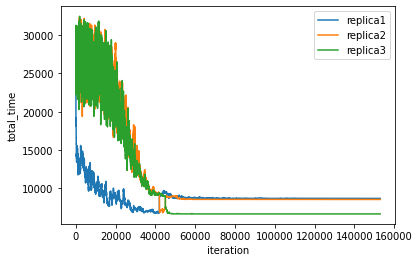

In [48]:
plot_RE(distance_min_distribution)

In [49]:
output_solution(route,distance)

replica1 best solution: 8683.688611502352
replica2 best solution: 8545.799212563305
replica3 best solution: 6659.431532931466


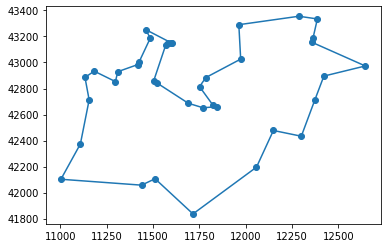

Route: [14 19 22 25 24 21 23 27 26 30 35 33 32 37 36 34 31 29 28 20 13  9  0  1
  3  2  4  5  6  7  8 11 10 18 17 16 15 12]

Distance_scaled: 6659.431532931466


In [50]:
plot_route(route[2])

In [95]:
N=3
T=[200,4500,5000]
cooling_rate=[0.9,0.72,0.7]
T_min=1
iteration=3000
route,distance_min_distribution,duration=MCMC_RE(N,T,cooling_rate,T_min,iteration,distance)

start: 2022-01-06 21:38:56.876116
[180.0, 3240.0, 3500.0]
[162.0, 2332.7999999999997, 2450.0]
[145.8, 1679.6159999999998, 1715.0]
[131.22000000000003, 1209.3235199999997, 1200.5]
[118.09800000000003, 870.7129343999998, 840.3499999999999]
[106.28820000000003, 626.9133127679999, 588.2449999999999]
[95.65938000000003, 451.3775851929599, 411.7714999999999]
[86.09344200000002, 324.99186133893113, 288.2400499999999]
[77.48409780000003, 233.9941401640304, 201.7680349999999]
[69.73568802000003, 168.4757809181019, 141.23762449999992]
[62.762119218000024, 121.30256226103336, 98.86633714999994]
[56.485907296200025, 87.33784482794401, 69.20643600499994]
[50.83731656658002, 62.88324827611969, 48.44450520349996]
[45.75358490992202, 45.27593875880617, 33.91115364244997]
[41.17822641892982, 32.59867590634044, 23.737807549714976]
[37.06040377703684, 23.471046652565114, 16.616465284800483]
[33.35436339933316, 16.899153589846883, 11.631525699360338]
[30.018927059399843, 12.167390584689755, 8.142067989552

replica1 best solution: 7569.322299555369
replica2 best solution: 7363.4354095843455
replica3 best solution: 6659.906740386758


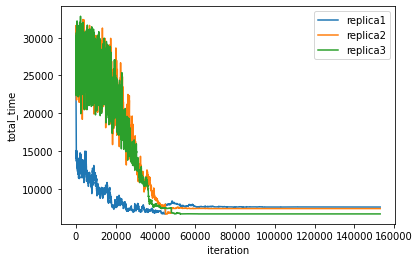

In [96]:
plot_RE(distance_min_distribution)
output_solution(route,distance)

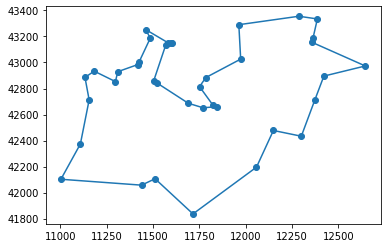

Route: [ 5  4  2  3  1  0  9 13 20 28 29 31 34 36 37 32 33 35 30 26 27 23 21 24
 25 22 19 14 12 15 17 18 16 10 11  8  7  6]

Distance_scaled: 6659.906740386758


In [98]:
plot_route(route[2])